<a href="https://colab.research.google.com/github/RoryChenXY/gemini-workshop/blob/main/02-multimodal-capabilities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2025 Google LLC

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Workshop: Build with Gemini (Part 2)

<a target="_blank" href="https://colab.sandbox.google.com/github/markmcd/gemini-workshop/blob/main/02-multimodal-capabilities.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This workshop teaches how to build with Gemini using the Gemini API and Python SDK.

Course outline:

- **[Part 1: Quickstart + Text prompting](./01-text-prompting.ipynb)**

- **Part 2 (this notebook): Multimodal capabilities (image, video, audio, docs, code, speech generation)**
  - Image
  - Audio
  - Video
  - Documents (PDFs)
  - Code
  - Text to Speech
  - Final excercise: Analyze supermarket invoice

- **[Part 3: Thinking models + agentic capabilities (tool usage)](./03-thinking-and-tools.ipynb)**

## 0. Use the Google AI Studio as playground

Explore and play with all models in the [Google AI Studio](https://aistudio.google.com/apikey).

## 1. Setup

Get a free API key in the [Google AI Studio](https://aistudio.google.com/apikey) and set up the [Google Gen AI Python SDK](https://github.com/googleapis/python-genai)

In [1]:
%pip install -U -q google-genai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 6.1 MB/s eta 0:00:00


In [2]:
from google import genai
from google.genai import types
import os
import sys

try:
    from google.colab import userdata
    GEMINI_API_KEY = userdata.get('GEMINI_API_KEY')
except ImportError:
    GEMINI_API_KEY = os.getenv('GEMINI_API_KEY')


client = genai.Client(api_key=GEMINI_API_KEY)

# MODEL = "gemini-2.0-flash"
# MODEL = "gemini-2.5-pro"
# MODEL = "gemini-2.5-flash-lite"
MODEL = "gemini-2.5-flash"

## 2. Image understanding

Gemini models are able to process and understand images, e.g., you can use Gemini to describe, caption, and answer questions about images, and you can even use it for object detection.

In [3]:
!curl -o image.jpg "https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1582k  100 1582k    0     0  11.5M      0 --:--:-- --:--:-- --:--:-- 11.5M


(1024, 1024)


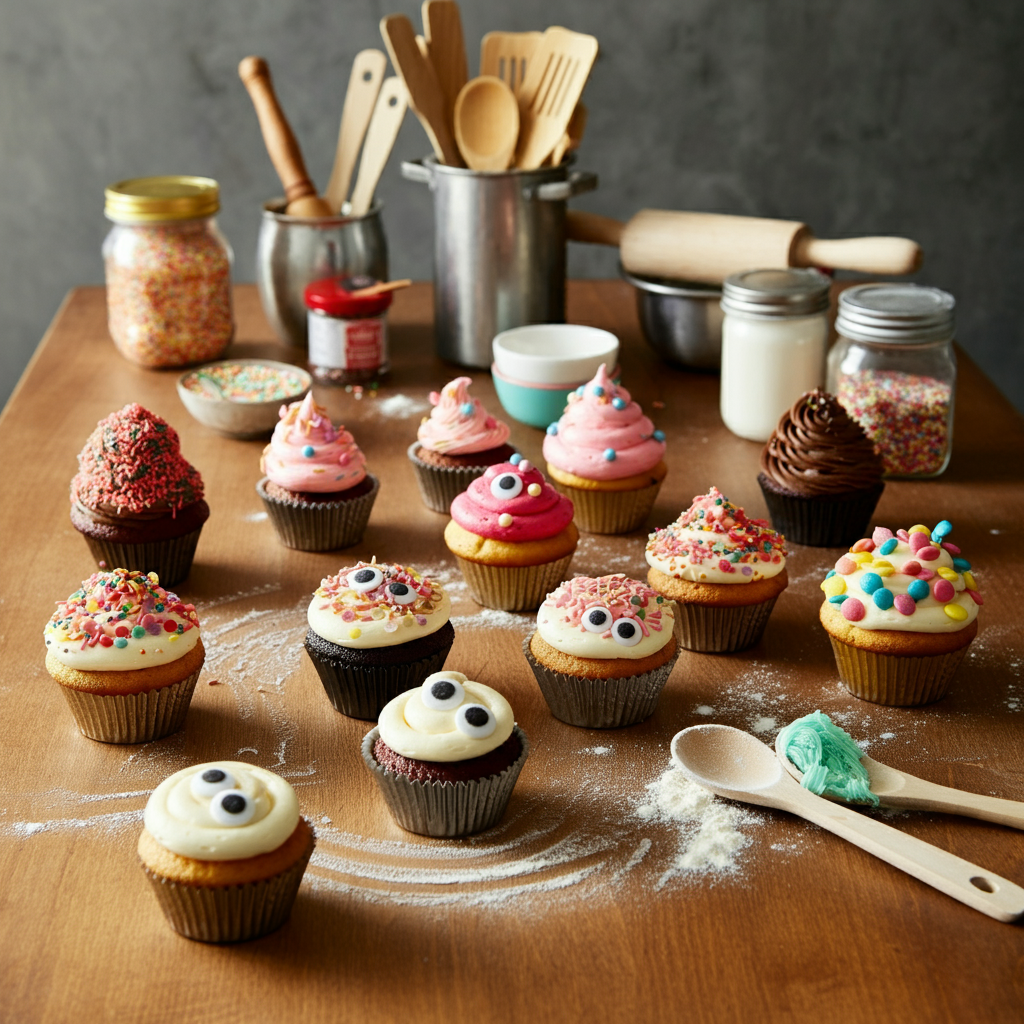

In [4]:
from PIL import Image
image = Image.open("image.jpg")
print(image.size)
image

For total image payload size less than 20MB, you can upload base64 encoded images in the HTTP request, or upload locally stored image files.

A simple mechanism that works with common Python tools is to pass a Pillow image object directly in the prompt. In this approach, the SDK does the encoding for you.

In [5]:
response = client.models.generate_content(
    model=MODEL,
    contents=["What is this image?", image])

print(response.text)

This image captures a vibrant and cheerful scene of **freshly baked and decorated cupcakes** arranged on a wooden table, surrounded by various baking supplies and tools.

Here's a detailed description:

*   **Main Subject:** Approximately 15 distinct cupcakes are prominently displayed across the wooden surface. They feature a variety of frostings (pink, red, white, chocolate brown) and are generously adorned with colorful sprinkles (jimmies, confetti style). Several of the cupcakes have whimsical "googly eyes" made from icing or candy, giving them a playful, monster-like, or character appearance.
*   **Setting:** The cupcakes are spread out on a warm-toned wooden table, which is lightly dusted with what appears to be flour or powdered sugar, suggesting recent baking activity.
*   **Baking Supplies and Tools:** In the background and around the cupcakes, numerous items associated with baking and decorating are visible:
    *   Several clear glass jars filled with colorful sprinkles (jimm

Or you can perform the base64 encoding yourself.

In [6]:
import requests

res = requests.get("https://storage.googleapis.com/generativeai-downloads/images/Cupcakes.jpg")

response = client.models.generate_content(
    model=MODEL,
    contents=[
        "What is this image?",
        types.Part.from_bytes(data=res.content, mime_type="image/jpeg")
    ]
)

print(response.text)

This image depicts a vibrant and colorful scene of **numerous decorated cupcakes** arranged on a wooden table.

Here's a breakdown of what's visible:

*   **Cupcakes:** There are many cupcakes, each with different colored frostings and decorations. Some have colorful sprinkles, others have "googly eye" candy decorations, and some simply have various shades of pink, red, and brown frosting.
*   **Baking/Decorating Supplies:** The table shows signs of recent activity, with scattered flour, and various kitchen items in the background. These include:
    *   Jars filled with colorful sprinkles.
    *   A jar of what appears to be milk or a white liquid.
    *   Metal pots/containers holding wooden spatulas, spoons, and other utensils.
    *   A wooden rolling pin.
    *   Small bowls, some empty, one possibly containing more sprinkles.
    *   A small red jar, possibly food coloring or jam.
    *   Two wooden spoons on the right, one with a dollop of turquoise/mint green frosting.

Overall

You can use the File API for large payloads (>20MB), or items you want to reuse across multiple requests.

 The File API lets you store up to 20 GB of files per project, with a per-file maximum size of 2 GB. Files are stored for 48 hours. They can be accessed in that period with your API key, but cannot be downloaded from the API. It is available at no cost in all regions where the Gemini API is available.

In [7]:
uploaded_image = client.files.upload(file="image.jpg")
print(uploaded_image.to_json_dict())
print()

response = client.models.generate_content(
    model=MODEL,
    contents=["What is this image?", uploaded_image]
)

print(response.text)

{'name': 'files/0avlw3ojweoz', 'mime_type': 'image/jpeg', 'size_bytes': 1619989, 'create_time': '2025-10-24T02:00:20.919530Z', 'expiration_time': '2025-10-26T02:00:20.649541Z', 'update_time': '2025-10-24T02:00:20.919530Z', 'sha256_hash': 'MmRlYjBjZTlkMzUxMWI2N2RiOTliZmE5ZjFkOTVkN2JhZTNiZGMwNDNlYmU1MTQ4ZjkxMzhiMjJmODY2MDY2Nw==', 'uri': 'https://generativelanguage.googleapis.com/v1beta/files/0avlw3ojweoz', 'state': 'ACTIVE', 'source': 'UPLOADED'}

This image is a vibrant and inviting scene showcasing a collection of **various decorated cupcakes** on a wooden table.

Key elements visible are:
*   **Numerous cupcakes:** They feature different colored frostings (pink, white, chocolate, yellow, red/magenta) and a variety of toppings, including colorful sprinkles, small candy balls, and several with whimsical "googly eyes" made from frosting.
*   **Baking and decorating supplies:** In the background and foreground, there are kitchen utensils like wooden spatulas, spoons, and a rolling pin. Ja

## **!! Exercise !!**  Multiple image understanding

**TODO**: Ask Gemini to compare the images and list key differences.

In [8]:
image_url_1 = "https://plus.unsplash.com/premium_photo-1694819488591-a43907d1c5cc?fm=jpg&q=60&w=3000&ixlib=rb-4.1.0&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MXx8Y3V0ZSUyMGRvZ3xlbnwwfHwwfHx8MA%3D%3D" # Dog
image_url_2 = "https://images.pexels.com/photos/2071882/pexels-photo-2071882.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500" # Cat

image_response_req_1 = requests.get(image_url_1)
image_response_req_2 = requests.get(image_url_2)

response = client.models.generate_content(
    model=MODEL,
    # TODO: Ask gemini to compare the images and list key differences
    contents=[
        "compare the images and list key differences",
        types.Part.from_bytes(data=image_response_req_1.content, mime_type="image/jpeg"),
        types.Part.from_bytes(data=image_response_req_2.content, mime_type="image/jpeg"),
    ]
)

print(response.text)

Here's a comparison of the two images, highlighting their key differences:

**Image 1 (Puppy):**
*   **Subject Species:** A dog (specifically, a Golden Retriever puppy).
*   **Coat:** Light golden/cream colored, fluffy fur.
*   **Accessories:** Wearing a bright orange collar.
*   **Ears:** Floppy, hanging down.
*   **Eyes:** Dark brown, round.
*   **Pose/Framing:** Full body shot, sitting upright, looking directly at the camera.
*   **Background:** Bright, plain white/light grey draped fabric, giving a soft, airy feel.
*   **Lighting:** Soft, even, and bright, illuminating the puppy and background uniformly.
*   **Overall Mood:** Bright, cheerful, innocent, playful.
*   **Other:** Contains numerous "Unsplash+" watermarks.

**Image 2 (Cat):**
*   **Subject Species:** A cat (specifically, a tabby kitten or young cat).
*   **Coat:** Striped (tabby pattern) with shades of brown, black, and tan, shorter fur.
*   **Accessories:** No collar or accessories visible.
*   **Ears:** Pointed and er

## 3. Bounding box detection

Gemini models are trained to return bounding box coordinates.

**Important**: Gemini returns bounding box coordinates in this format:

- `[y_min, x_min, y_max, x_max]`
- and normalized to `[0,1000]`

**Tip**: Ask Gemini to return JSON format and configure `config={'response_mime_type': 'application/json'}`:

In [9]:
import json

prompt = """Detect the 2d bounding boxes of all cupcakes. The label must describe the cupcake flavour."""

response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, image],
    config={'response_mime_type': 'application/json'}
)

bboxes = json.loads(response.text)
bboxes

[{'box_2d': [744, 134, 917, 305], 'label': 'cupcake with googly eyes'},
 {'box_2d': [550, 296, 698, 442],
  'label': 'chocolate cupcake with googly eyes'},
 {'box_2d': [655, 353, 814, 513],
  'label': 'chocolate cupcake with googly eyes'},
 {'box_2d': [555, 41, 722, 199],
  'label': 'vanilla cupcake with rainbow sprinkles'},
 {'box_2d': [395, 66, 563, 203],
  'label': 'chocolate cupcake with red sprinkles'},
 {'box_2d': [560, 513, 707, 661], 'label': 'vanilla cupcake with googly eyes'},
 {'box_2d': [477, 624, 630, 768],
  'label': 'vanilla cupcake with rainbow sprinkles'},
 {'box_2d': [386, 252, 532, 367],
  'label': 'vanilla cupcake with pink frosting'},
 {'box_2d': [366, 396, 497, 506],
  'label': 'vanilla cupcake with pink frosting'},
 {'box_2d': [357, 529, 514, 650],
  'label': 'vanilla cupcake with pink frosting and blue candies'},
 {'box_2d': [443, 434, 589, 564], 'label': 'pink cupcake with googly eyes'},
 {'box_2d': [384, 737, 530, 863], 'label': 'chocolate cupcake'}]

Create a helper function to denormalize and draw the bounding boxes:


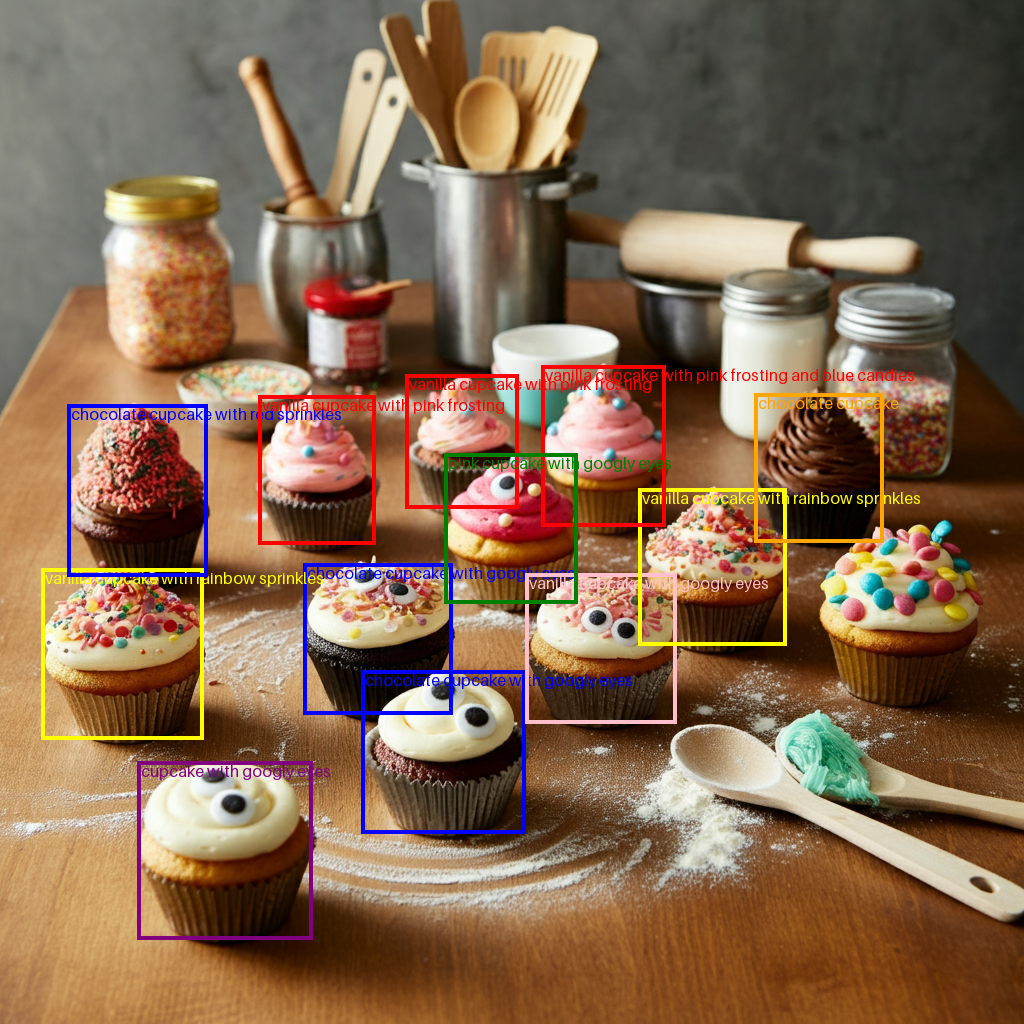

In [10]:
from PIL import ImageDraw, ImageFont

line_width = 4
font = ImageFont.load_default(size=16)

labels = list({box['label'] for box in bboxes})

def draw_bounding_boxes(image, bounding_boxes):
    img = image.copy()
    width, height = img.size

    draw = ImageDraw.Draw(img)

    colors = ['blue','red','green','yellow','orange','pink','purple']

    for box in bounding_boxes:
        y_min, x_min, y_max, x_max = box['box_2d']
        label = box['label']

        # Convert normalized coordinates to absolute coordinates
        y_min = int(y_min/1000 * height)
        x_min = int(x_min/1000 * width)
        y_max = int(y_max/1000 * height)
        x_max = int(x_max/1000 * width)

        color = colors[labels.index(label) % len(colors)]
        draw.rectangle([(x_min, y_min), (x_max, y_max)], outline=color, width=line_width)

        draw.text((x_min+line_width, y_min), label, fill=color, font=font)

    display(img)

draw_bounding_boxes(image, bboxes)

## 4. Audio

You can use Gemini to process audio files. For example, you can use it to generate a transcript of an audio file or to summarize the content of an audio file.

Gemini represents each second of audio as 32 tokens; so, one minute of audio is represented as 1,920 tokens.

For more info about technical details and supported formats, see [the docs](https://ai.google.dev/gemini-api/docs/audio#supported-formats).

In [11]:
import requests
url = 'https://raw.githubusercontent.com/markmcd/gemini-workshop/main/data/audio.mp3'
res = requests.get(url)
with open("audio.mp3", "wb") as f:
    f.write(res.content)

In [12]:
import IPython
IPython.display.Audio("audio.mp3")

In [13]:
audio_file = client.files.upload(file="audio.mp3")

prompt = """Generate a transcript of the episode. Include timestamps and identify speakers.

Speakers:
- John

eg:
[00:00] Brady: Hello there.
[00:02] Tim: Hi Brady.

It is important to include the correct speaker names. Use the names you identified earlier. If you really don't know the speaker's name, identify them with a letter of the alphabet, eg there may be an unknown speaker 'A' and another unknown speaker 'B'.

If there is music or a short jingle playing, signify like so:
[01:02] [MUSIC] or [01:02] [JINGLE]

If you can identify the name of the music or jingle playing then use that instead, eg:
[01:02] [Firework by Katy Perry] or [01:02] [The Sofa Shop jingle]

If there is some other sound playing try to identify the sound, eg:
[01:02] [Bell ringing]

Each individual caption should be quite short, a few short sentences at most.

Signify the end of the episode with [END].
"""

response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, audio_file]
)
print(response.text)


[00:00] John: If the Porsche Macan has proven anything,
[00:01] John: it's that the days of sacrificing performance for practicality are gone.
[00:07] John: Long gone.
[00:08] John: Engineered to deliver a driving experience like no other,
[00:11] John: the Macan has demonstrated excellence in style and performance
[00:15] John: to become the leading sports car in its class.
[00:17] John: So don't let those five doors fool you.
[00:19] John: Once you're in the driver's seat,
[00:20] John: one thing will become immediately clear.
[00:23] [CAR ACCELERATION]
[00:24] John: This is a Porsche.
[00:25] John: The Macan,
[00:26] John: now leasing from 3.99%.
[00:29] John: Conditions apply.
[00:31] [BEEP]
[END]


## 5. Video

Gemini models are able to process videos. The 1M context window support up to approximately an hour of video data.

For technical details about supported video formats, see [the docs](https://ai.google.dev/gemini-api/docs/vision#technical-details-video).

In [14]:
!curl -o Post_its.mp4 "https://storage.googleapis.com/generativeai-downloads/videos/post_its.mp4"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 51.8M  100 51.8M    0     0   142M      0 --:--:-- --:--:-- --:--:--  142M


Use the File API to upload a video. Here we also check the processing state:

In [16]:
import time

def upload_video(video_file_name):
  video_file = client.files.upload(file=video_file_name)

  while video_file.state == "PROCESSING":
      print('Waiting for video to be processed.')
      time.sleep(10)
      video_file = client.files.get(name=video_file.name)

  if video_file.state == "FAILED":
    raise ValueError(video_file.state)

  print(f'Video processing complete: ' + video_file.uri)
  return video_file

post_its_video = upload_video('Post_its.mp4')

Waiting for video to be processed.
Video processing complete: https://generativelanguage.googleapis.com/v1beta/files/r8g3577wmbth


Now you can use the uploaded file in your prompt. Processing and generating a response from a long context prompt, such as one including video, will take longer than shorter prompts.

In [ ]:
response = client.models.generate_content(
    model=MODEL,
    contents=[
        post_its_video,
        'Detect all sticky notes and list the names on the notes',
    ]
)

print(response.text)

#### YouTube video support

The Gemini API and AI Studio support YouTube URLs as a file data Part. You can include a YouTube URL with a prompt asking the model to summarize, translate, or otherwise interact with the video content.

In [17]:
youtube_url = "https://youtu.be/LlWDx0LSDok"


response = client.models.generate_content(
    model=MODEL,
    contents=[
        'Can you summarize this video?',
        'Here is the link',
        youtube_url
    ]
)

print(response.text)

In this video, Jordan Peterson discusses the often-overlooked "dark side" of entrepreneurship, contrasting the romanticized ideal with the brutal reality.

He emphasizes that while entrepreneurship is often pitched as a path to freedom, control, and wealth, it is in fact an incredibly demanding and unforgiving endeavor. Peterson highlights several key difficulties:

*   **High Failure Rate:** A vast majority of businesses fail, often within the first few years.
*   **Immense Sacrifice:** Entrepreneurs sacrifice enormous amounts of time, money, personal relationships, and even their health.
*   **Extreme Loneliness:** The burden of responsibility rests solely on the entrepreneur, leading to isolation and the feeling that no one else cares as much.
*   **Constant Stress and Pressure:** Entrepreneurs face relentless uncertainty, financial strain, and the need to constantly solve problems across all aspects of a business (sales, marketing, finance, HR, operations).
*   **Dealing with Incom

#### **!! Exercise !!**

- Your turn! Use this video (*Delicious Homemade Pizza Dough Recipe* from Jojo's Plate): https://youtu.be/i1ppNKmgPtw
- Ask Gemini about to describe the video and to get the recipe.

In [ ]:
youtube_url = "https://www.youtube.com/watch?v=i1ppNKmgPtw"

video_file = client.files.upload(file="audio.mp3")

response = client.models.generate_content(
    model=MODEL,
    # TODO: ask Gemini to generate the recipe from the youtube video
    contents=[
        "generate the recipe from the youtube video",
        types.Part.from_bytes(data=image_response_req_1.content, mime_type="image/jpeg"),
        types.Part.from_bytes(data=image_response_req_2.content, mime_type="image/jpeg"),
    ]
)

print(response.text)

1 minute audio = ~130 words or ~170 tokens
8192 / 170 = ~48 min output length.

You can use Gemini for transcribing, but be aware of the output token limit.

Another useful prompt you can try with audio files:
- Summarize the audio
- Refer to timestamps: `Provide a transcript of the speech from 02:30 to 03:29.`

## 6. PDFs

PDFs can also be used in the same way:

In [18]:
URL = "https://storage.googleapis.com/generativeai-downloads/data/pdf_structured_outputs/invoice.pdf"
!curl -q $URL -o invoice.pdf

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  547k  100  547k    0     0  3261k      0 --:--:-- --:--:-- --:--:-- 3280k


In [19]:
uploaded_pdf = client.files.upload(file='invoice.pdf')

response = client.models.generate_content(
  model=MODEL,
  contents=[
    'Extract the date of the invoice and the total cost',
    uploaded_pdf,
  ]
)

print(response.text)

The date of the invoice is: 10/09/2012
The total cost is: $544,46


### Structured extraction

**Next step**: A powerful feature is to combine it with structured outputs using Pydantic.

In [20]:
from pydantic import BaseModel, Field


class Item(BaseModel):
    description: str = Field(description="The description of the item")
    quantity: float = Field(description="The Qty of the item")
    gross_worth: float = Field(description="The gross worth of the item")


class Invoice(BaseModel):
    """Extract the invoice number, date and all list items with description, quantity and gross worth and the total gross worth."""
    invoice_number: str = Field(description="The invoice number e.g. 1234567890")
    date: str = Field(description="The date of the invoice e.g. 2024-01-01")
    items: list[Item] = Field(description="The list of items with description, quantity and gross worth")
    total_gross_worth: float = Field(description="The total gross worth of the invoice")


prompt = f"Extract the structured data from the following PDF file"
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt, uploaded_pdf],
    config={'response_mime_type': 'application/json',
            'response_schema': Invoice
    }
)

response.parsed

Invoice(invoice_number='27301261', date='2012-10-09', items=[Item(description='Lilly Pulitzer dress Size 2', quantity=5.0, gross_worth=247.5), Item(description='New ERIN Erin Fertherston Straight Dress White Sequence Lining Sleeveless SZ 10', quantity=1.0, gross_worth=65.99), Item(description='Sequence dress Size Small', quantity=3.0, gross_worth=115.5), Item(description='fire los angeles dress Medium', quantity=3.0, gross_worth=21.45), Item(description="Eileen Fisher Women's Long Sleeve Fleece Lined Front Pockets Dress XS Gray", quantity=3.0, gross_worth=52.77), Item(description='Lularoe Nicole Dress Size Small Light Solid Grey/ White Ringer Tee Trim', quantity=2.0, gross_worth=8.25), Item(description='J.Crew Collection Black & White sweater Dress sz S', quantity=1.0, gross_worth=33.0)], total_gross_worth=544.46)

In [ ]:
response.parsed.model_dump()

## 7. Code

Gemini is a powerful way to understand and generate code.

Use [gitingest](https://github.com/cyclotruc/gitingest) to chat with a GitHub repo. First install the tool, then process the repository for LLM consumption.

In [21]:
%pip install -q gitingest

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00


In [22]:
from gitingest import ingest_async

summary, tree, content = await ingest_async("https://github.com/patrickloeber/snake-ai-pytorch")

2025-10-24 02:24:40.273 | INFO     | gitingest.entrypoint:ingest_async:89 | Starting ingestion process | {"source":"https://github.com/patrickloeber/snake-ai-pytorch"}
2025-10-24 02:24:40.273 | INFO     | gitingest.entrypoint:ingest_async:98 | Parsing remote repository | {"source":"https://github.com/patrickloeber/snake-ai-pytorch"}
2025-10-24 02:24:40.670 | INFO     | gitingest.clone:clone_repo:56 | Starting git clone operation | {"url":"https://github.com/patrickloeber/snake-ai-pytorch","local_path":"/tmp/gitingest/c4e9dc03-c6be-41ad-87f9-b5a33b3de123/patrickloeber-snake-ai-pytorch","partial_clone":false,"subpath":"/","branch":null,"tag":null,"commit":"7ea69e6b79c59db731d8befc9ec174b075efc808","include_submodules":false}
2025-10-24 02:24:41.307 | INFO     | logging:callHandlers:1762 | HTTP Request: HEAD https://github.com/patrickloeber/snake-ai-pytorch "HTTP/1.1 200 OK"
2025-10-24 02:24:41.316 | INFO     | gitingest.clone:clone_repo:97 | Executing git clone command | {"command":"git 

In [23]:
print(summary)

Repository: patrickloeber/snake-ai-pytorch
Commit: 7ea69e6b79c59db731d8befc9ec174b075efc808
Files analyzed: 8

Estimated tokens: 4.4k


In [24]:
print(tree)

Directory structure:
└── patrickloeber-snake-ai-pytorch/
    ├── README.md
    ├── agent.py
    ├── arial.ttf
    ├── game.py
    ├── helper.py
    ├── LICENSE
    ├── model.py
    └── snake_game_human.py



In [25]:
prompt = f"""Explain what the model.py file in this code base does:

Code:
{content}
"""

chat = client.chats.create(model=MODEL)

response = chat.send_message(prompt)
print(response.text)

2025-10-24 02:25:03.843 | INFO     | logging:callHandlers:1762 | AFC is enabled with max remote calls: 10.
2025-10-24 02:25:13.815 | INFO     | logging:callHandlers:1762 | HTTP Request: POST https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash:generateContent "HTTP/1.1 200 OK"


The `model.py` file in this codebase is central to the reinforcement learning aspect of teaching the AI to play Snake. It defines the neural network model and the training logic for that model, which are both crucial components of a Deep Q-Network (DQN).

Here's a breakdown of what it does:

1.  **`Linear_QNet` Class**:
    *   **Neural Network Architecture**: This class defines the neural network itself using PyTorch's `nn.Module`.
    *   **Constructor (`__init__`)**: It initializes a simple feed-forward neural network with two linear layers.
        *   `input_size`: The number of features describing the game state (e.g., danger straight, food location).
        *   `hidden_size`: The number of neurons in the intermediate hidden layer.
        *   `output_size`: The number of possible actions the agent can take (e.g., move straight, turn right, turn left).
    *   **Forward Pass (`forward`)**: This method defines how data flows through the network. It takes an input `x` (which is th

In [ ]:
response = chat.send_message("Explain the `save` function in more detail")
print(response.text)

In [ ]:
response = chat.send_message("Refactor the `save` function and use pathlib instead of os. Return only the refactored function")
print(response.text)

## 8. Text to Speech

In [ ]:
import wave

response = client.models.generate_content(
   model="gemini-2.5-flash-preview-tts",
   contents="Say cheerfully: Have a wonderful day!",
   config=types.GenerateContentConfig(
      response_modalities=["AUDIO"],
      speech_config=types.SpeechConfig(
         voice_config=types.VoiceConfig(
            prebuilt_voice_config=types.PrebuiltVoiceConfig(
               voice_name='Kore',
            )
         )
      ),
   )
)

data = response.candidates[0].content.parts[0].inline_data.data

# Write to wave file
with wave.open("out.wav", "wb") as wf:
    wf.setnchannels(1)
    wf.setsampwidth(2)
    wf.setframerate(24000)
    wf.writeframes(data)

In [ ]:
import IPython
IPython.display.Audio("out.wav")

## Exercise: Analyze supermarket invoice

Task:
- Define a schema for a single item that contains `item_name` and `item_cost`
- Define a schema for the supermarket invoice with `items`, `date`, and `total_cost`
- Use Gemini to extract all info from the supermarket bill into the defined supermarket invoice schema.
- Ask Gemini to list a few healthy recipes based on the items. If you have dietary restrictions, tell Gemini about it!

In [ ]:
import requests
url = 'https://raw.githubusercontent.com/markmcd/gemini-workshop/main/data/rewe_invoice.pdf'
res = requests.get(url)
with open("rewe_invoice.pdf", "wb") as f:
    f.write(res.content)

In [ ]:
# TODO: upload the PDF

In [ ]:
## TODO Define schemas

class SupermarketItem(BaseModel):
    ...

class SupermarketInvoice(BaseModel):
    items: list[SupermarketItem] = Field(description="The list of items")
    ...


prompt = f"Extract the structured data from the following PDF file"
response = client.models.generate_content(
    model=MODEL,
    contents=[...],
    config={'response_mime_type': 'application/json',
            'response_schema': ...
    }
)

response.parsed

In [ ]:
response.parsed.model_dump()

Now you can do follow up questions with the info:

In [ ]:
prompt = "..." # TODO: ask Gemini to list a few healthy recipes based on the items.
response = client.models.generate_content(
    model=MODEL,
    contents=[prompt],
)

print(response.text)

## Recap & Next steps

Great job, you're now an expert in working with multimodal data :)

Gemini's multimodal capabilities are powerful, and with the Python SDK you only need a few lines of code to process various media types, including text, audio, images, videos, and PDFs.

Key Takeaways:
- Use `client.files.upload` for larger payloads
- Directly include smaller files in your prompt with e.g. `types.Part.from_bytes(data=res.content, mime_type="image/jpeg")`
- For many use cases, it's helpful to constrain Gemini to respond with JSON using structured outputs.
- Use detailed prompts for generating transcripts
- Gemini can generate speech

More helpful resources:

- [Audio understanding docs](https://ai.google.dev/gemini-api/docs/audio?lang=python)
- [Visio understanding docs](https://ai.google.dev/gemini-api/docs/vision?lang=python)
- [Structured output docs](https://ai.google.dev/gemini-api/docs/structured-output?lang=python)
- [Speech generation docs](https://ai.google.dev/gemini-api/docs/speech-generation)
- [Video understanding cookbook](https://github.com/google-gemini/cookbook/blob/main/quickstarts/Video_understanding.ipynb)

Next steps:

- **[Part 3: Thinking models + agentic capabilities (tool usage)](./03-thinking-and-tools.ipynb)**
